In [1]:
import warnings
from scipy.stats.mstats import gmean
from datetime import datetime
import math

import numpy as np
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numbers

plt.style.use('seaborn-poster')
warnings.filterwarnings('ignore')

In [2]:
# Calculate portfolio variance given weight metrix
def portfolio_variance(V, w):
    w_t = w.transpose()
    V_P = w_t @ V @ w
    return V_P

# Calculate portfolio return given weight metrix
def portfolio_return(mu, w):
    mu_t = mu.transpose()
    E_P = mu_t @ w
    return E_P

In [3]:
Var = np.array([[0.16, 0.02],[0.02, 0.09]])
#Var = Var.reshape((1,-1))
Var

array([[0.16, 0.02],
       [0.02, 0.09]])

In [4]:
weight = np.array([0.4, 0.4])
weight = weight.reshape((1,-1))
weight = weight.transpose()
weight

array([[0.4],
       [0.4]])

**4.1a**

In [5]:
V_P = portfolio_variance(Var, weight)
V_P = round(V_P[:, 0][0], 5)
V_P

0.0464

**4.1b**

In [6]:
# beta_i = cov(Rmarket, Ri) / var(Rmarket)
# cov(aX + bY, Z) = a × cov(X, Z) + b × cov(Y, Z)

beta_1 = 0.064 / 0.04
print('Beta for Asset 1: ' + str(beta_1))

beta_2 = 0.032 / 0.04
print('Beta for Asset 2: ' + str(beta_2))

beta_P = (0.4 * 0.064 + 0.4 * 0.032) / 0.04
beta_P = round(beta_P, 5)
print('Beta for portfolio: ' + str(beta_P))

Beta for Asset 1: 1.6
Beta for Asset 2: 0.8
Beta for portfolio: 0.96


**4.1c**

In [7]:
# E[ri] − rf = βi (E[rmarket] − rf )

E_P = beta_P * (0.1 - 0.04) + 0.04
print('Expected return for portfolio is: ' + str(E_P))

Expected return for portfolio is: 0.0976


**4.1d**

In [ ]:
# Refer to the attacked document for calculation details

**4.2a1**

In [8]:
data_raw = pd.read_csv('ps4_data.csv')
data_raw

,Date,Market: World,Market: US,S&P 500,Long Term Bond,Corp Bnd,HML,SMB,Long - Short,T-bills,...,FORD,CHRYSLER,APPLE,IBM,COMPAQ,HP,BUSCH,HEINEKEN,KIRIN,MOLSON
0,1/31/85,5.58,9.24,7.68,3.64,2.77,-0.66,-2.91,2.99,0.65,...,7.92,3.96,-0.26,10.74,22.48,10.71,2.58,6.12,1.24,9.38
1,2/28/85,0.25,0.98,1.37,-4.93,-3.15,-0.22,-1.35,-5.51,0.58,...,-8.44,0.35,-14.53,-0.91,20.00,-1.34,4.88,-5.93,-1.60,-14.82
2,3/29/85,3.52,-0.19,0.18,3.07,2.45,0.58,2.32,2.45,0.62,...,-5.05,5.29,-10.43,-5.26,-16.67,-7.94,3.25,10.84,11.05,3.63
3,4/30/85,-0.22,-0.38,-0.32,2.42,3.09,2.43,1.42,1.71,0.72,...,-2.15,-0.34,-3.84,-0.36,10.82,-6.64,3.73,-2.48,5.82,-0.86
4,5/31/85,5.19,5.15,6.15,8.96,8.90,-0.92,3.39,8.29,0.66,...,6.38,2.52,-17.98,2.54,-2.72,4.75,8.97,-1.43,15.86,9.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,8/29/97,-6.67,-3.89,-5.56,-3.17,-2.40,2.13,-10.65,-3.58,0.41,...,5.20,-5.55,24.26,-3.96,14.66,-12.14,-0.14,2.83,-10.52,-3.65
152,9/30/97,5.45,5.76,5.48,3.16,2.26,0.77,-2.96,2.72,0.44,...,4.94,5.95,-0.30,4.57,14.12,13.34,5.86,11.44,1.00,0.13
153,10/31/97,-5.25,-3.43,-3.34,3.41,1.91,-0.67,0.52,2.99,0.42,...,-2.29,-4.24,-21.46,-7.08,-14.38,-11.41,-11.49,-7.27,2.66,-5.94
154,11/28/97,1.79,3.13,4.63,1.48,1.01,-1.62,6.18,1.09,0.39,...,-1.57,-2.66,4.20,11.39,-2.44,-0.81,8.83,4.02,-10.63,7.07


In [9]:
data_raw.columns.values

array(['Date', 'Market: World', 'Market: US', 'S&P 500', 'Long Term Bond',
       'Corp Bnd', 'HML', 'SMB', 'Long - Short', 'T-bills', 'Inflation',
       'TOYOTA', 'GM', 'BMW', 'FORD', 'CHRYSLER', 'APPLE', 'IBM',
       'COMPAQ', 'HP', 'BUSCH', 'HEINEKEN', 'KIRIN', 'MOLSON'],
      dtype=object)

In [10]:
data_raw.describe()

,Market: World,Market: US,S&P 500,Long Term Bond,Corp Bnd,HML,SMB,Long - Short,T-bills,Inflation,...,FORD,CHRYSLER,APPLE,IBM,COMPAQ,HP,BUSCH,HEINEKEN,KIRIN,MOLSON
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,1.321346,1.189038,1.482885,1.028141,0.970577,-0.082885,0.252821,0.568141,0.460641,0.272051,...,1.886667,1.861923,0.875449,0.890897,4.040897,1.810641,1.655962,1.939231,1.334487,0.977115
std,4.130736,4.179681,4.204618,2.868567,2.171941,1.873516,3.189208,2.852102,0.136626,0.207270,...,7.719182,9.999683,13.158830,7.626489,13.544229,9.527103,6.078831,7.030780,9.644957,6.710401
min,-16.960000,-22.950000,-21.520000,-5.050000,-5.020000,-5.580000,-13.140000,-5.550000,0.210000,-0.460000,...,-21.860000,-35.660000,-31.640000,-26.210000,-27.070000,-28.900000,-15.540000,-17.640000,-22.580000,-20.040000
25%,-1.152500,-1.002500,-0.632500,-0.830000,-0.357500,-1.235000,-1.567500,-1.250000,0.380000,0.150000,...,-3.350000,-4.135000,-8.037500,-4.557500,-3.870000,-4.517500,-2.277500,-1.860000,-4.612500,-3.930000
50%,1.580000,1.500000,1.690000,1.025000,1.005000,0.055000,0.525000,0.490000,0.455000,0.270000,...,1.745000,1.320000,-0.280000,1.200000,3.140000,1.225000,1.410000,1.240000,0.800000,0.775000
75%,3.742500,3.927500,4.145000,2.747500,2.352500,0.990000,2.232500,2.345000,0.570000,0.392500,...,6.502500,7.602500,8.485000,5.597500,13.970000,7.560000,5.275000,6.667500,6.505000,6.170000
max,11.770000,12.650000,13.430000,11.450000,8.900000,5.160000,8.730000,10.930000,0.790000,1.030000,...,33.400000,29.080000,37.190000,23.890000,43.530000,27.810000,25.850000,23.880000,42.000000,19.350000


In [22]:
df = data_raw
df = df.set_index('Date')
df

,Market: World,Market: US,S&P 500,Long Term Bond,Corp Bnd,HML,SMB,Long - Short,T-bills,Inflation,...,FORD,CHRYSLER,APPLE,IBM,COMPAQ,HP,BUSCH,HEINEKEN,KIRIN,MOLSON
Date,,,,,,,,,,,,,,,,,,,,,
1/31/85,5.58,9.24,7.68,3.64,2.77,-0.66,-2.91,2.99,0.65,0.19,...,7.92,3.96,-0.26,10.74,22.48,10.71,2.58,6.12,1.24,9.38
2/28/85,0.25,0.98,1.37,-4.93,-3.15,-0.22,-1.35,-5.51,0.58,0.41,...,-8.44,0.35,-14.53,-0.91,20.00,-1.34,4.88,-5.93,-1.60,-14.82
3/29/85,3.52,-0.19,0.18,3.07,2.45,0.58,2.32,2.45,0.62,0.44,...,-5.05,5.29,-10.43,-5.26,-16.67,-7.94,3.25,10.84,11.05,3.63
4/30/85,-0.22,-0.38,-0.32,2.42,3.09,2.43,1.42,1.71,0.72,0.41,...,-2.15,-0.34,-3.84,-0.36,10.82,-6.64,3.73,-2.48,5.82,-0.86
5/31/85,5.19,5.15,6.15,8.96,8.90,-0.92,3.39,8.29,0.66,0.37,...,6.38,2.52,-17.98,2.54,-2.72,4.75,8.97,-1.43,15.86,9.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/29/97,-6.67,-3.89,-5.56,-3.17,-2.40,2.13,-10.65,-3.58,0.41,0.19,...,5.20,-5.55,24.26,-3.96,14.66,-12.14,-0.14,2.83,-10.52,-3.65
9/30/97,5.45,5.76,5.48,3.16,2.26,0.77,-2.96,2.72,0.44,0.25,...,4.94,5.95,-0.30,4.57,14.12,13.34,5.86,11.44,1.00,0.13
10/31/97,-5.25,-3.43,-3.34,3.41,1.91,-0.67,0.52,2.99,0.42,0.25,...,-2.29,-4.24,-21.46,-7.08,-14.38,-11.41,-11.49,-7.27,2.66,-5.94


In [12]:
df.columns

Index(['Market: World', 'Market: US', 'S&P 500', 'Long Term Bond', 'Corp Bnd',
       'HML', 'SMB', 'Long - Short', 'T-bills', 'Inflation', 'TOYOTA', 'GM',
       'BMW', 'FORD', 'CHRYSLER', 'APPLE', 'IBM', 'COMPAQ', 'HP', 'BUSCH',
       'HEINEKEN', 'KIRIN', 'MOLSON'],
      dtype='object')

In [23]:
df_raw = df.sub(df['T-bills'], axis=0)
df_raw = df_raw.drop(columns=['T-bills'])
df_raw

,Market: World,Market: US,S&P 500,Long Term Bond,Corp Bnd,HML,SMB,Long - Short,Inflation,TOYOTA,...,FORD,CHRYSLER,APPLE,IBM,COMPAQ,HP,BUSCH,HEINEKEN,KIRIN,MOLSON
Date,,,,,,,,,,,,,,,,,,,,,
1/31/85,4.93,8.59,7.03,2.99,2.12,-1.31,-3.56,2.34,-0.46,7.11,...,7.27,3.31,-0.91,10.09,21.83,10.06,1.93,5.47,0.59,8.73
2/28/85,-0.33,0.40,0.79,-5.51,-3.73,-0.80,-1.93,-6.09,-0.17,-5.29,...,-9.02,-0.23,-15.11,-1.49,19.42,-1.92,4.30,-6.51,-2.18,-15.40
3/29/85,2.90,-0.81,-0.44,2.45,1.83,-0.04,1.70,1.83,-0.18,-0.56,...,-5.67,4.67,-11.05,-5.88,-17.29,-8.56,2.63,10.22,10.43,3.01
4/30/85,-0.94,-1.10,-1.04,1.70,2.37,1.71,0.70,0.99,-0.31,1.86,...,-2.87,-1.06,-4.56,-1.08,10.10,-7.36,3.01,-3.20,5.10,-1.58
5/31/85,4.53,4.49,5.49,8.30,8.24,-1.58,2.73,7.63,-0.29,-6.69,...,5.72,1.86,-18.64,1.88,-3.38,4.09,8.31,-2.09,15.20,8.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/29/97,-7.08,-4.30,-5.97,-3.58,-2.81,1.72,-11.06,-3.99,-0.22,-14.43,...,4.79,-5.96,23.85,-4.37,14.25,-12.55,-0.55,2.42,-10.93,-4.06
9/30/97,5.01,5.32,5.04,2.72,1.82,0.33,-3.40,2.28,-0.19,15.25,...,4.50,5.51,-0.74,4.13,13.68,12.90,5.42,11.00,0.56,-0.31
10/31/97,-5.67,-3.85,-3.76,2.99,1.49,-1.09,0.10,2.57,-0.17,-8.17,...,-2.71,-4.66,-21.88,-7.50,-14.80,-11.83,-11.91,-7.69,2.24,-6.36


In [14]:
#Portfolio 1: GM and IBM
w_1 = np.array([0.5, 0.5])
w_1 = w_1.reshape((1,-1))
w_1 = w_1.transpose()
w_1

array([[0.5],
       [0.5]])

In [15]:
#Portfolio 2: GM, IBM and Anheuser Busch
w_2 = np.array([1/3, 1/3, 1/3])
w_2 = w_2.reshape((1,-1))
w_2 = w_2.transpose()
w_2

array([[0.33333333],
       [0.33333333],
       [0.33333333]])

In [16]:
#Portfolio 3: GM, Toyota, IBM and Anheuser Busch
w_3 = np.array([1/4, 1/4, 1/4, 1/4])
w_3 = w_3.reshape((1,-1))
w_3 = w_3.transpose()
w_3

array([[0.25],
       [0.25],
       [0.25],
       [0.25]])

In [17]:
#Portfolio 4: 'TOYOTA', 'GM', 'BMW', 'FORD', 'CHRYSLER', 'APPLE', 'IBM', 'COMPAQ', 'HP', 
#'BUSCH','HEINEKEN', 'KIRIN', 'MOLSON'
w_4 = np.ones(13)
w_4 /= 13
w_4 = w_4.reshape((1,-1))
w_4 = w_4.transpose()
w_4

array([[0.07692308],
       [0.07692308],
       [0.07692308],
       [0.07692308],
       [0.07692308],
       [0.07692308],
       [0.07692308],
       [0.07692308],
       [0.07692308],
       [0.07692308],
       [0.07692308],
       [0.07692308],
       [0.07692308]])

In [24]:
df = df_raw/100
df

,Market: World,Market: US,S&P 500,Long Term Bond,Corp Bnd,HML,SMB,Long - Short,Inflation,TOYOTA,...,FORD,CHRYSLER,APPLE,IBM,COMPAQ,HP,BUSCH,HEINEKEN,KIRIN,MOLSON
Date,,,,,,,,,,,,,,,,,,,,,
1/31/85,0.0493,0.0859,0.0703,0.0299,0.0212,-0.0131,-0.0356,0.0234,-0.0046,0.0711,...,0.0727,0.0331,-0.0091,0.1009,0.2183,0.1006,0.0193,0.0547,0.0059,0.0873
2/28/85,-0.0033,0.0040,0.0079,-0.0551,-0.0373,-0.0080,-0.0193,-0.0609,-0.0017,-0.0529,...,-0.0902,-0.0023,-0.1511,-0.0149,0.1942,-0.0192,0.0430,-0.0651,-0.0218,-0.1540
3/29/85,0.0290,-0.0081,-0.0044,0.0245,0.0183,-0.0004,0.0170,0.0183,-0.0018,-0.0056,...,-0.0567,0.0467,-0.1105,-0.0588,-0.1729,-0.0856,0.0263,0.1022,0.1043,0.0301
4/30/85,-0.0094,-0.0110,-0.0104,0.0170,0.0237,0.0171,0.0070,0.0099,-0.0031,0.0186,...,-0.0287,-0.0106,-0.0456,-0.0108,0.1010,-0.0736,0.0301,-0.0320,0.0510,-0.0158
5/31/85,0.0453,0.0449,0.0549,0.0830,0.0824,-0.0158,0.0273,0.0763,-0.0029,-0.0669,...,0.0572,0.0186,-0.1864,0.0188,-0.0338,0.0409,0.0831,-0.0209,0.1520,0.0885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/29/97,-0.0708,-0.0430,-0.0597,-0.0358,-0.0281,0.0172,-0.1106,-0.0399,-0.0022,-0.1443,...,0.0479,-0.0596,0.2385,-0.0437,0.1425,-0.1255,-0.0055,0.0242,-0.1093,-0.0406
9/30/97,0.0501,0.0532,0.0504,0.0272,0.0182,0.0033,-0.0340,0.0228,-0.0019,0.1525,...,0.0450,0.0551,-0.0074,0.0413,0.1368,0.1290,0.0542,0.1100,0.0056,-0.0031
10/31/97,-0.0567,-0.0385,-0.0376,0.0299,0.0149,-0.0109,0.0010,0.0257,-0.0017,-0.0817,...,-0.0271,-0.0466,-0.2188,-0.0750,-0.1480,-0.1183,-0.1191,-0.0769,0.0224,-0.0636


In [25]:
describe = df.describe()
describe.loc['mean']

Market: World     0.008607
Market: US        0.007284
S&P 500           0.010222
Long Term Bond    0.005675
Corp Bnd          0.005099
HML              -0.005435
SMB              -0.002078
Long - Short      0.001075
Inflation        -0.001886
TOYOTA            0.012476
GM                0.005559
BMW               0.014395
FORD              0.014260
CHRYSLER          0.014013
APPLE             0.004148
IBM               0.004303
COMPAQ            0.035803
HP                0.013500
BUSCH             0.011953
HEINEKEN          0.014786
KIRIN             0.008738
MOLSON            0.005165
Name: mean, dtype: float64

In [32]:
mu_temp = np.array([[describe.loc['mean','GM'], describe.loc['mean','IBM']]])
mu_1 = mu_temp @ w_1
covar_1 = df[['GM', 'IBM']].cov()
var_1 = portfolio_variance(covar_1, w_1)
print('Average monthly excess return for Portfolio 1: ' + str(round(mu_1[:, 0][0] * 100, 5)) + '%')
print('Variance of monthly excess return for Portfolio 1: ' + str(round(var_1.iloc[0,0], 5)))

Average monthly excess return for Portfolio 1: 0.49308%
Variance of monthly excess return for Portfolio 1: 0.00408


In [29]:
mu_temp = np.array([[describe.loc['mean','GM'], describe.loc['mean','IBM'], describe.loc['mean','BUSCH']]])
mu_2 = mu_temp @ w_2
covar_2 = df[['GM', 'IBM', 'BUSCH']].cov()
var_2 = portfolio_variance(covar_2, w_2)
print('Average monthly excess return for Portfolio 2: ' + str(round(mu_2[:, 0][0]*100, 5)) + '%')
print('Variance of monthly excess return for Portfolio 2: ' + str(round(var_2.iloc[0,0], 5)))

Average monthly excess return for Portfolio 2: 0.72716%
Variance of monthly excess return for Portfolio 2: 0.00275


In [30]:
mu_temp = np.array([[describe.loc['mean','GM'], describe.loc['mean','IBM'], describe.loc['mean','BUSCH'], describe.loc['mean','TOYOTA']]])
mu_3 = mu_temp @ w_3
covar_3 = df[['GM', 'IBM', 'BUSCH','TOYOTA']].cov()
var_3 = portfolio_variance(covar_3, w_3)
print('Average monthly excess return for Portfolio 3: ' + str(round(mu_3[:, 0][0]*100, 5)) + '%')
print('Variance of monthly excess return for Portfolio 3: ' + str(round(var_3.iloc[0,0], 5)))

Average monthly excess return for Portfolio 3: 0.85728%
Variance of monthly excess return for Portfolio 3: 0.0021


In [33]:
mu_temp = np.array([describe.iloc[1,-13:]])
mu_4 = mu_temp @ w_4
covar_4 = df.iloc[:,-13:].cov()
var_4 = portfolio_variance(covar_4, w_4)
print('Average monthly excess return for Portfolio 4: ' + str(round(mu_4[:, 0][0]*100, 5)) + '%')
print('Variance of monthly excess return for Portfolio 4: ' + str(round(var_4.iloc[0,0], 5)))

Average monthly excess return for Portfolio 4: 1.22384%
Variance of monthly excess return for Portfolio 4: 0.00251


**4.2a2**

In [133]:
df.iloc[:,-13:]

,TOYOTA,GM,BMW,FORD,CHRYSLER,APPLE,IBM,COMPAQ,HP,BUSCH,HEINEKEN,KIRIN,MOLSON
Date,,,,,,,,,,,,,
1/31/85,7.11,5.44,-1.55,7.27,3.31,-0.91,10.09,21.83,10.06,1.93,5.47,0.59,8.73
2/28/85,-5.29,-3.45,-2.75,-9.02,-0.23,-15.11,-1.49,19.42,-1.92,4.30,-6.51,-2.18,-15.40
3/29/85,-0.56,-8.78,6.80,-5.67,4.67,-11.05,-5.88,-17.29,-8.56,2.63,10.22,10.43,3.01
4/30/85,1.86,-8.10,-6.02,-2.87,-1.06,-4.56,-1.08,10.10,-7.36,3.01,-3.20,5.10,-1.58
5/31/85,-6.69,7.15,8.15,5.72,1.86,-18.64,1.88,-3.38,4.09,8.31,-2.09,15.20,8.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8/29/97,-14.43,1.85,-13.22,4.79,-5.96,23.85,-4.37,14.25,-12.55,-0.55,2.42,-10.93,-4.06
9/30/97,15.25,6.23,19.36,4.50,5.51,-0.74,4.13,13.68,12.90,5.42,11.00,0.56,-0.31
10/31/97,-8.17,-4.53,-15.37,-2.71,-4.66,-21.88,-7.50,-14.80,-11.83,-11.91,-7.69,2.24,-6.36


In [171]:
from sklearn.linear_model import LinearRegression
Y_1 = (df['IBM'] * 0.5).add(0.5 * df['GM'], axis=0)
X_1 = df[['Market: World']]
reg_1 = LinearRegression().fit(X_1, Y_1)
print('Portfolio 1 Beta from linear reg: ' + str(reg_1.coef_[0]))

# beta_i = cov(Rmarket, Ri) / var(Rmarket)
# cov(aX + bY, Z) = a × cov(X, Z) + b × cov(Y, Z)
covar_P1 = df[['GM', 'IBM', 'Market: World']].cov()
beta_P1 = (0.5 * covar_P1.iloc[0,2] + 0.5 * covar_P1.iloc[1,2]) / covar_P1.iloc[2,2]
print('Portfolio 1 Beta from definition: ' + str(beta_P1))

Portfolio 1 Beta from linear reg: 0.7605655117093622
Portfolio 1 Beta from definition: 0.760565511709362


In [239]:
(df['IBM'] * 0.5).add(0.5 * df['GM'], axis=0)

Date
1/31/85     7.765
2/28/85    -2.470
3/29/85    -7.330
4/30/85    -4.590
5/31/85     4.515
            ...  
8/29/97    -1.260
9/30/97     5.180
10/31/97   -6.015
11/28/97    3.140
12/31/97    0.125
Length: 156, dtype: float64

In [240]:
X_1

,Market: World
Date,
1/31/85,4.93
2/28/85,-0.33
3/29/85,2.90
4/30/85,-0.94
5/31/85,4.53
...,...
8/29/97,-7.08
9/30/97,5.01
10/31/97,-5.67


In [168]:
covar_P1 = df[['GM', 'IBM', 'Market: World']].cov()
covar_P1

,GM,IBM,Market: World
GM,56.772822,24.180821,14.458082
IBM,24.180821,58.159391,11.488662
Market: World,14.458082,11.488662,17.057534


In [175]:
Y_2 = (df['IBM'] / 3).add(df['GM'] / 3, axis=0).add(df['BUSCH'] / 3, axis=0)
X_2 = df[['Market: World']]
reg_2 = LinearRegression().fit(X_2, Y_2)
print('Portfolio 2 Beta from linear reg: ' + str(reg_2.coef_[0]))

# beta_i = cov(Rmarket, Ri) / var(Rmarket)
# cov(aX + bY, Z) = a × cov(X, Z) + b × cov(Y, Z)
covar_P2 = df[['GM', 'IBM', 'BUSCH', 'Market: World']].cov()
beta_P2 = ( covar_P2.iloc[0,3] / 3 + covar_P2.iloc[1,3] / 3 + covar_P2.iloc[2,3] / 3) / covar_P2.iloc[3,3]
print('Portfolio 2 Beta from definition: ' + str(beta_P2))

Portfolio 2 Beta from linear reg: 0.719627149450217
Portfolio 2 Beta from definition: 0.7196271494502172


In [177]:
Y_3 = (df['IBM'] / 4).add(df['GM'] / 4, axis=0).add(df['BUSCH'] / 4, axis=0).add(df['TOYOTA'] / 4, axis=0)
X_3 = df[['Market: World']]
reg_3 = LinearRegression().fit(X_3, Y_3)
print('Portfolio 3 Beta from linear reg: ' + str(reg_3.coef_[0]))

# beta_i = cov(Rmarket, Ri) / var(Rmarket)
# cov(aX + bY, Z) = a × cov(X, Z) + b × cov(Y, Z)
covar_P3 = df[['GM', 'IBM', 'BUSCH', 'TOYOTA', 'Market: World']].cov()
beta_P3 = ( covar_P3.iloc[0,4] / 4 + covar_P3.iloc[1,4] / 4 + covar_P3.iloc[2,4] / 4 + covar_P3.iloc[3,4] / 4) / covar_P3.iloc[4,4]
print('Portfolio 3 Beta from definition: ' + str(beta_P3))

Portfolio 3 Beta from linear reg: 0.7782630788364356
Portfolio 3 Beta from definition: 0.7782630788364358


In [186]:
Y_4 = (df.iloc[:,-13:] / 13).sum(axis=1)
X_4 = df[['Market: World']]
reg_4 = LinearRegression().fit(X_4, Y_4)
print('Portfolio 4 Beta from linear reg: ' + str(reg_4.coef_[0]))

# beta_i = cov(Rmarket, Ri) / var(Rmarket)
# cov(aX + bY, Z) = a × cov(X, Z) + b × cov(Y, Z)
covar_P4 = pd.concat([df.iloc[:,-13:], df[['Market: World']]], axis=1).cov()
beta_P4 = ( covar_P4.iloc[:-1,13].sum() / 13) / covar_P4.iloc[13,13]
print('Portfolio 4 Beta from definition: ' + str(beta_P4))

Portfolio 4 Beta from linear reg: 0.9312077484900599
Portfolio 4 Beta from definition: 0.9312077484900597


**4.2a3**

In [ ]:
# Refer to the attacked document for discussion details 

**4.2b1**

In [196]:
reg_list = []
for i in range(13):
    Y_each = df.iloc[:,-13+i]
    X_each = df[['Market: World']]
    reg_each = LinearRegression().fit(X_each, Y_each)
    reg_list.append(reg_each.coef_[0])
    print('Beta of each 13 common stock from linear reg: ' + str(reg_each.coef_[0]))



Beta of each 13 common stock from linear reg: 0.9541708669950916
Beta of each 13 common stock from linear reg: 0.8476068099640736
Beta of each 13 common stock from linear reg: 1.0318213876620583
Beta of each 13 common stock from linear reg: 0.9293587782224121
Beta of each 13 common stock from linear reg: 1.1132679820821931
Beta of each 13 common stock from linear reg: 0.8638697662129102
Beta of each 13 common stock from linear reg: 0.6735242134546509
Beta of each 13 common stock from linear reg: 1.0702236838767991
Beta of each 13 common stock from linear reg: 1.0485210154701063
Beta of each 13 common stock from linear reg: 0.6377504249319272
Beta of each 13 common stock from linear reg: 0.7676464214981905
Beta of each 13 common stock from linear reg: 1.4600447276256705
Beta of each 13 common stock from linear reg: 0.7078946523746922


In [206]:
df_reg = pd.DataFrame(data={'Beta': reg_list})
df_reg['Stock Name'] = df.iloc[:,-13:].columns.values
df_reg = df_reg.set_index('Stock Name')
df_reg

,Beta
Stock Name,
TOYOTA,0.954171
GM,0.847607
BMW,1.031821
FORD,0.929359
CHRYSLER,1.113268
APPLE,0.863870
IBM,0.673524
COMPAQ,1.070224
HP,1.048521


In [218]:
beta_P1_new = sum(df_reg.loc[['GM','IBM'],'Beta'].tolist())/2
print('Portfolio 1 Beta from definition: ' + str(beta_P1))
print('Portfolio 1 Beta from weighted average of each asset: ' + str(beta_P1_new))

Portfolio 1 Beta from definition: 0.760565511709362
Portfolio 1 Beta from weighted average of each asset: 0.7605655117093622


In [220]:
beta_P2_new = sum(df_reg.loc[['GM','IBM','BUSCH'],'Beta'].tolist())/3
print('Portfolio 2 Beta from definition: ' + str(beta_P2))
print('Portfolio 2 Beta from weighted average of each asset: ' + str(beta_P2_new))

Portfolio 2 Beta from definition: 0.7196271494502172
Portfolio 2 Beta from weighted average of each asset: 0.7196271494502172


In [221]:
beta_P3_new = sum(df_reg.loc[['GM','IBM','BUSCH','TOYOTA'],'Beta'].tolist())/4
print('Portfolio 3 Beta from definition: ' + str(beta_P3))
print('Portfolio 3 Beta from weighted average of each asset: ' + str(beta_P3_new))

Portfolio 3 Beta from definition: 0.7782630788364358
Portfolio 3 Beta from weighted average of each asset: 0.7782630788364359


In [223]:
beta_P4_new = sum(df_reg.iloc[:,0].tolist())/13
print('Portfolio 4 Beta from definition: ' + str(beta_P4))
print('Portfolio 4 Beta from weighted average of each asset: ' + str(beta_P4_new))

Portfolio 4 Beta from definition: 0.9312077484900597
Portfolio 4 Beta from weighted average of each asset: 0.9312077484900596


**4.2b2**

In [224]:
capm_expected_return_list = []
for i in range(13):
    capm_expected_return_list.append(reg_list[i] * describe.loc['mean','Market: World'])

capm_expected_return_list

[0.8212597584066084,
 0.7295395280376674,
 0.8880939597524649,
 0.7999038663584822,
 0.9581954612447181,
 0.7435371378808168,
 0.5797057444907432,
 0.9211470130393447,
 0.9024674150459687,
 0.5489150612539092,
 0.6607172116318077,
 1.2566679844762738,
 0.6092885575278839]

In [226]:
describe.iloc[1,-13:].tolist()

[1.2476282051282048,
 0.5558974358974357,
 1.4394871794871793,
 1.4260256410256413,
 1.4012820512820503,
 0.4148076923076919,
 0.4302564102564101,
 3.58025641025641,
 1.35,
 1.195320512820513,
 1.4785897435897448,
 0.8738461538461538,
 0.5164743589743589]

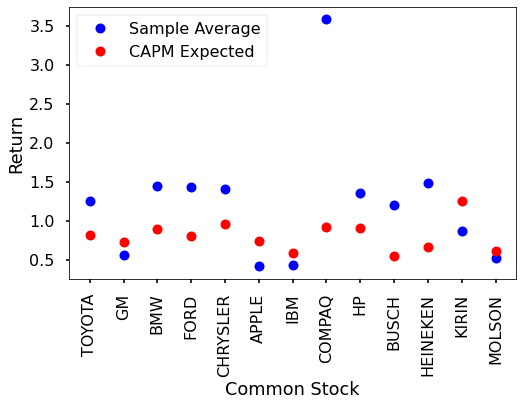

In [238]:
plt.figure(figsize=(8, 5))
plt.xlabel('Common Stock')
plt.ylabel('Return')
plt.xticks(rotation=90)
plt.plot(df.iloc[:,-13:].columns.values, describe.iloc[1,-13:].tolist(),'bo', markersize=10, label='Sample Average')
plt.plot(df.iloc[:,-13:].columns.values, capm_expected_return_list,'ro', markersize=10, label='CAPM Expected')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.show()

**3a**

In [35]:
prob = 10 * pow(0.5, 9) * 0.5 + pow(0.5, 10)
print('Probably of any given manager achieves: ' + str(prob))

Probably of any given manager achieves: 0.0107421875


In [37]:
i=1
prob_best=0
for i in range(1,501):
    prob_best += pow(prob, i)* pow((1 - prob), 500-i) * (math.factorial(500)/(math.factorial(i)*math.factorial(500-i))) 
print('Probably of at least 1 out of 500 manager achieves: ' + str(prob_best))

Probably of at least 1 out of 500 manager achieves: 0.9954840995436917
